# 🔥 PyTorch Pilot Crash Notebook ©


---


Tensor Basics

    Create, Operations, NumPy, GPU Support

Autograd

    Linear Regression

Training Loop with: Model, Loss & Optimizer

    Typical PyTorch Training Pipeline

Neural Network

    GPU, Datasets, DataLoader, Transforms & Evaluation

Convolutional Neural Network

    MaxPooling, Save/Load Model

---



# Tensor Basics

Everything in PyTorch is based on Tensor operations. A Tensor is a multi-dimensional matrix containing elements of a single data type.

In [ ]:
import torch

# torch.empty(size): creates an uninitialized tensor
x = torch.empty(1)  # scalar (0-dimensional tensor)
print("empty(1):", x)

x = torch.empty(3)  # vector (1-dimensional tensor)
print("empty(3):", x)

x = torch.empty(2, 3)  # matrix (2-dimensional tensor)
print("empty(2,3):", x)

x = torch.empty(2, 2, 3)  # 3-dimensional tensor
print("empty(2, 2, 3):", x)

# tensor with random numbers uniformly distributed between [0, 1]
x = torch.rand(5, 3)
print("rand(5,3):", x)

x = torch.zeros(5, 3)
print("zeros(5,3):", x)

x = torch.ones(5, 3)
print("ones(5,3):", x)

empty(1): tensor([3.2657e+10])
empty(3): tensor([13524.7969,     0.0000, 13529.1406])
empty(2,3): tensor([[1.3774e+04, 0.0000e+00, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 0.0000e+00]])
empty(2, 2, 3): tensor([[[9.7764e+20, 4.3330e-41, 9.7764e+20],
         [4.3330e-41, 4.4842e-44, 0.0000e+00]],

        [[8.9683e-44, 0.0000e+00, 1.1450e+04],
         [0.0000e+00, 3.3631e-44, 0.0000e+00]]])
rand(5,3): tensor([[0.8011, 0.3878, 0.8181],
        [0.7618, 0.1093, 0.6999],
        [0.9285, 0.0907, 0.0708],
        [0.8352, 0.7023, 0.5784],
        [0.7609, 0.6808, 0.9345]])
zeros(5,3): tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
ones(5,3): tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
print("size:", x.size())
print("shape:", x.shape)

size: torch.Size([5, 3])
shape: torch.Size([5, 3])


In [ ]:
print(x.dtype)

# specify dtype (default: float32)
x = torch.zeros(5, 3, dtype=torch.float16)
print(x.dtype)

torch.float32
torch.float16


In [ ]:
# construct tensor from list
x = torch.tensor([5.5, 3])
print(x, x.dtype)

tensor([5.5000, 3.0000]) torch.float32


requires_grad argument

tells PyTorch to calculate the gradients (how much the loss changes when model parameters change) for this tensor later in optimization steps

use this for variables in our model that we want to optimize

In [ ]:
x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


In [ ]:
# operations

x = torch.ones(2, 2)
y = torch.rand(2, 2)

z = x + y # addition, or z = torch.add(x, y)

# every operations with trailing underscore is in-place operations
# y.add_(x) # modifies y in-place

print(x)
print(y)
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0.3023, 0.8602],
        [0.8491, 0.4914]])
tensor([[1.3023, 1.8602],
        [1.8491, 1.4914]])


In [ ]:
z = x - y # or, z = torch.sub(x, y)

z = x * y # or, z = torch.mul(x, y)

z = x / y # or, z = torch.div(x, y)

In [ ]:
# slicing operations
x = torch.rand(5, 3)
print(x)

print(x[:, 0])  # all rows, column 0
print(x[1, :])  # row 1, all columns
print(x[1, 1])  # element at position (1, 1)

print(x[1, 1].item()) # actual float value, not the tensor

tensor([[0.5379, 0.3331, 0.3846],
        [0.6630, 0.6873, 0.1034],
        [0.8271, 0.3225, 0.9963],
        [0.9365, 0.8285, 0.1495],
        [0.3204, 0.5394, 0.1836]])
tensor([0.5379, 0.6630, 0.8271, 0.9365, 0.3204])
tensor([0.6630, 0.6873, 0.1034])
tensor(0.6873)
0.6873068809509277


In [ ]:
# reshape tensors using torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # if given -1, PyTorch calculates the dimension

print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [ ]:
a = torch.ones(5)
print(a)

b = a.numpy() # converting to NumPy
print(b)
print(type(b))

# important: if the tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so changing one
# will also change the other
a.add_(1)

print(a)
print(b)  # b also changes

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [ ]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)  # converting to tensor, shares same memory
c = torch.tensor(a)      # creates a copy
print(a)
print(b)
print(c)

a += 1
print(a)
print(b)  # changed due to shared memory
print(c)  # unchanged because it's a copy

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


**GPU support**

by default all tensors are created on the CPU, but we can also move them to the GPU (if it's available), or create them directly on the GPU

neural network computations run much faster on GPU


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = torch.rand(2,2).to(device) # move tensors to GPU device

# or, simply x = x.to("cpu")
# or, simply x = x.to("cuda")

x = torch.rand(2,2, device=device) # or directly create them on GPU

# Autograd

the autograd package provides automatic differentiation for all operations on tensors

 torch.autograd is an engine for computing the vector-jacobian product, it computes partial derivatives while applying the chain rule


---


grad_fn: references a func that has created the tensor, it'll compute gradients during backpropagation

when we call y.backward(), this object knows how to calculate ∂y/∂x

In [ ]:
import torch

# requires_grad = True -> tracks all operations on the tensor
x = torch.randn(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([ 0.3384, -1.4057,  1.0933], requires_grad=True)
tensor([2.3384, 0.5943, 3.0933], grad_fn=<AddBackward0>)


In [ ]:
z = y * y * 3
print(z)
z = z.mean()
print(z)

tensor([16.4040,  1.0594, 28.7055], grad_fn=<MulBackward0>)
tensor(15.3896, grad_fn=<MeanBackward0>)


In [ ]:
# let's compute the gradients with backpropagation
# when we finish our computation we can call .backward() and have all the gradients computed automatically
# it is the partial derivative of the function with respect to the tensor

print(x.grad)
z.backward()
print(x.grad)  # dz/dx

# !!! careful!!! backward() accumulates the gradient for this tensor into .grad attribute
# !!! we need to be careful during optimization !!! use optimizer.zero_grad()

None
tensor([4.6767, 1.1885, 6.1866])


#### stop a tensor from tracking history:

for instance: during the training loop when we want to update our weights, or after training during evaluation, these operations should not be part of the gradient computation.

to prevent this, we can use:

x.requires_grad_(False)

x.detach()

wrap in 'with torch.no_grad():'

In [ ]:
a = torch.randn(2, 2)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

a.requires_grad_(True)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

False
None
True


In [ ]:
# .detach(): get a new tensor with no gradient computation
a = torch.randn(2, 2, requires_grad=True)
b = a.detach()
print(a.requires_grad)
print(b.requires_grad)

True
False


In [ ]:
# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)

with torch.no_grad():
    b = a ** 2
    print(b.requires_grad)

True
False


#### Gradient Descent Autograd

Linear Regression Instance

f(x) = wx + b

f(x) = 2x

w = 2, b = 0

In [ ]:
# training data: x values and corresponding y values
import torch

X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32) # Y = 2X

# the weight we want to learn (starts at 0.0)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x): # model: makes prediction
    return w * x

def loss(y, y_pred): # loss = MSE
    return ((y_pred - y)**2).mean()

X_test = 5.0

# before training, with w=0, prediction will be: 0 * 5 = 0
print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

Prediction before training: f(5.0) = 0.000


epoch - one complete pass through the entire training dataset

---

**forward pass:** make predictions with current w

**calculate loss:** compare predictions with true values

**backward pass:** compute gradient dl/dw

**update weight:** move w in direction that reduces loss

**zero gradients:** reset for next iteration

model learns that w ≈ 2.000 is exactly what we need!


In [ ]:
# training
learning_rate = 0.01
n_epochs = 100

for epoch in range(n_epochs):
    y_pred = forward(X)

    l = loss(Y, y_pred)

    l.backward()

    # w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad

    w.grad.zero_()

    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}')

print(f'Prediction after training: f({X_test}) = {forward(X_test).item():.3f}')

epoch 10: w = 1.998, loss = 0.000
epoch 20: w = 2.000, loss = 0.000
epoch 30: w = 2.000, loss = 0.000
epoch 40: w = 2.000, loss = 0.000
epoch 50: w = 2.000, loss = 0.000
epoch 60: w = 2.000, loss = 0.000
epoch 70: w = 2.000, loss = 0.000
epoch 80: w = 2.000, loss = 0.000
epoch 90: w = 2.000, loss = 0.000
epoch 100: w = 2.000, loss = 0.000
Prediction after training: f(5.0) = 10.000


# Training Loop with: Model, Loss & Optimizer

- design model
- construct loss and optimizer
- training loop (forward, backward, update weights)


In [ ]:
# linear regression (f = w * x) in PyTorch way
import torch
import torch.nn as nn

# 0) training samples, be aware of the shape!
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

# setting dtype to torch.float32 is optional but good practice for neural networks
# optimal precision for DL operations, ensures clarity and control

n_samples, n_features = X.shape
print(f'n_samples = {n_samples}, n_features = {n_features}')

X_test = torch.tensor([5], dtype=torch.float32) # test sample

n_samples = 8, n_features = 1


In [ ]:
# 1) design model (model = nn.Linear(input_size, output_size))

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # initialize the parent nn.Module class

        self.lin = nn.Linear(input_dim, output_dim) # define different layers
        # automatically initializes weight and bias

    def forward(self, x):
        return self.lin(x) # this is called automatically when we do model(X)

input_size, output_size = n_features, n_features
model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

Prediction before training: f(5.0) = -4.728


In [ ]:
# 2) define loss and optimizer
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# SGD Optimizer = Stochastic Gradient Descent - an algo that updates model weights using gradients

# 3) training loop
for epoch in range(n_epochs):
    y_predicted = model(X)
    l = loss(Y, y_predicted)
    l.backward()
    optimizer.step() # update weights
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        w, b = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l.item())

print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}')

epoch  10 : w =  2.0033421516418457  loss =  7.328832725761458e-05
epoch  20 : w =  2.00321102142334  loss =  6.765295256627724e-05
epoch  30 : w =  2.003085136413574  loss =  6.245338590815663e-05
epoch  40 : w =  2.0029640197753906  loss =  5.7651712268125266e-05
epoch  50 : w =  2.002847909927368  loss =  5.321830030879937e-05
epoch  60 : w =  2.0027360916137695  loss =  4.9125887016998604e-05
epoch  70 : w =  2.002628803253174  loss =  4.534921026788652e-05
epoch  80 : w =  2.002525806427002  loss =  4.1860952478600666e-05
epoch  90 : w =  2.002426862716675  loss =  3.864261816488579e-05
epoch  100 : w =  2.0023317337036133  loss =  3.5672121157404035e-05
Prediction after training: f(5.0) = 9.999


**key differences from manual approach:**

nn.Module for model structure | built-in nn.Linear layer | torch.optim optimizer for weight updates

# Neural Network

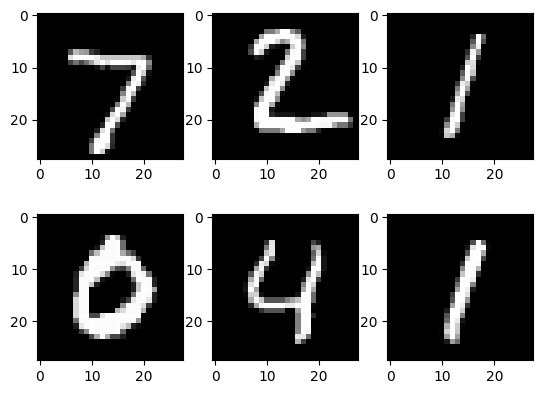

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # device configuration

# hyper-parameters
input_size = 784 # 28x28 pixels flattened
hidden_size = 500 # num of neurons in the hidden layer
num_classes = 10 # digits 0-9
num_epochs = 2 # num of passes through the dataset
batch_size = 100 # process 100 images at once (not all 60,000)
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
    train=False,
    transform=transforms.ToTensor())

# data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True)  # shuffle training data for better learning

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False)  # no need to shuffle test data

# some examples to visualize
examples = iter(test_loader)
example_data, example_targets = next(examples) # X, Y

for i in range(6):
    plt.subplot(2,3,i+1) # 2x3 grid, position i+1
    plt.imshow(example_data[i][0], cmap='grey') # i-th image, [0] gets first channel

plt.show()

Architecture: Input → Hidden (ReLU) → Output (no activation)

Flattening: Convert 28×28 images to 784-element vectors

Training loop: Process in batches, calculate loss, backpropagate, update weights

No softmax: CrossEntropyLoss automatically applies it

ReLU = Rectified Linear Unit - an activation function

Without ReLU, the neural network would just be linear transformations stacked together, which can only learn linear patterns!

Softmax = Converts raw scores (logits) into probabilities that sum to 1

In [ ]:
# fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)  # input to hidden layer
        self.relu = nn.ReLU()  # activation function
        self.l2 = nn.Linear(hidden_size, num_classes)  # hidden to output layer

    def forward(self, x):
        out = self.l1(x)      # linear transformation
        out = self.relu(out)  # non-linear activation
        out = self.l2(out)    # output layer
        # no activation and no softmax at the end (included in CrossEntropyLoss)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()  # includes softmax for classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)  # flatten images
        labels = labels.to(device)

        # forward pass and loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.4466
Epoch [1/2], Step [200/600], Loss: 0.2783
Epoch [1/2], Step [300/600], Loss: 0.2514
Epoch [1/2], Step [400/600], Loss: 0.2342
Epoch [1/2], Step [500/600], Loss: 0.1132
Epoch [1/2], Step [600/600], Loss: 0.1128
Epoch [2/2], Step [100/600], Loss: 0.1486
Epoch [2/2], Step [200/600], Loss: 0.0938
Epoch [2/2], Step [300/600], Loss: 0.1584
Epoch [2/2], Step [400/600], Loss: 0.1187
Epoch [2/2], Step [500/600], Loss: 0.0957
Epoch [2/2], Step [600/600], Loss: 0.1431


In [ ]:
# test the model - no gradients needed for evaluation
with torch.no_grad():
    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.reshape(-1, 784).to(device) # flatten images and move to device
        labels = labels.to(device)

        outputs = model(images) # predictions

        _, predictions = torch.max(outputs, 1) # predicted class (value : index)

        correct += (predictions == labels).sum().item() # count how many are correct
        total += labels.size(0)  # count total images processed

accuracy = (correct / total) * 100
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 97.07%


# Convolutional Neural Network


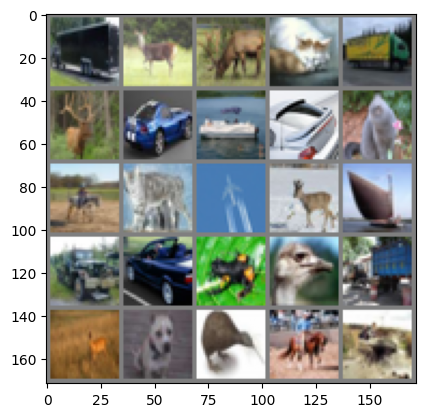

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper-parameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]
# we transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # mean : std

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
    download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
    download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
    shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(imgs):
    imgs = imgs / 2 + 0.5  # unnormalize (reverse the normalization)
    npimgs = imgs.numpy()  # convert to numpy array
    plt.imshow(np.transpose(npimgs, (1, 2, 0)))  # rearrange dimensions for matplotlib
    plt.show()

# one batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)  # create 5x5 grid
imshow(img_grid)

MaxPooling = Downsamples an image by taking the maximum value from each region | Preserves strongest features in each region



In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)      # 3 input channels (RGB), 32 output channels, 3x3 kernel
        self.pool = nn.MaxPool2d(2, 2)        # 2x2 max pooling with stride 2
        self.conv2 = nn.Conv2d(32, 64, 3)     # 32 in, 64 out, 3x3 kernel
        self.conv3 = nn.Conv2d(64, 64, 3)     # 64 in, 64 out, 3x3 kernel
        self.fc1 = nn.Linear(64*4*4, 64)      # fully connected layer (1024 -> 64)
        self.fc2 = nn.Linear(64, 10)          # output layer (64 -> 10 classes)
        # note: ouput of the previous layer should match the input of the next layer

    def forward(self, x):
        # Input: N, 3, 32, 32 (batch_size, channels, height, width)
        x = F.relu(self.conv1(x))    # -> N, 32, 30, 30 (loses 2 pixels from 3x3 conv)
        x = self.pool(x)             # -> N, 32, 15, 15 (halved by 2x2 pooling)
        x = F.relu(self.conv2(x))    # -> N, 64, 13, 13
        x = self.pool(x)             # -> N, 64, 6, 6
        x = F.relu(self.conv3(x))    # -> N, 64, 4, 4
        x = torch.flatten(x, 1)      # -> N, 1024 (64*4*4 = 1024)
        x = F.relu(self.fc1(x))      # -> N, 64
        x = self.fc2(x)              # -> N, 10 (output for 10 classes)
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / n_total_steps:.3f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

[1] loss: 1.481
[2] loss: 1.129
[3] loss: 0.973
[4] loss: 0.869
[5] loss: 0.791
[6] loss: 0.731
[7] loss: 0.682
[8] loss: 0.637
[9] loss: 0.598
[10] loss: 0.562
Finished Training


This trains the CNN to recognize objects in CIFAR-10 images!

In [ ]:
# load the saved model
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH))  # load trained weights
loaded_model.to(device)
loaded_model.eval()  # set model to evaluation mode

with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # test original model
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

        # test loaded model
        outputs2 = loaded_model(images)
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

acc = 100.0 * n_correct / n_samples
print(f'Accuracy of the model: {acc} %')

acc = 100.0 * n_correct2 / n_samples
print(f'Accuracy of the loaded model: {acc} %')

Accuracy of the model: 72.29 %
Accuracy of the loaded model: 72.29 %
